In [10]:
import sys
import importlib
import pandas as pd
import numpy as np
import geopandas
import seaborn
sys.path.insert(0, "/home/mqueyrel/Documents/deseabel/deseabel/ocean_ecosystem")
import noise_impactor
importlib.reload(noise_impactor)
from noise_impactor import FishingBoat, Cargo, PileDriving
import simulator
importlib.reload(simulator)
from simulator import Simulator
import marine_fauna
importlib.reload(marine_fauna)
from marine_fauna import Fish
import marine_map
importlib.reload(marine_map)
from marine_map import MaritimeMap
import matrix_conversion
importlib.reload(matrix_conversion)
from matrix_conversion import *

In [11]:
boat1 = FishingBoat(lat=45.70, lon=-2.1, speed=5, flotation_surface=15*8)
boat2 = FishingBoat(lat=45.85, lon=-1.75, speed=10, flotation_surface=13*6)
boat3 = FishingBoat(lat=46, lon=-1.9, speed=7, flotation_surface=20*8)

list_noise_impactor = [boat1, boat2]

fish = Fish("../../data/fish.geojson")

In [12]:
# Example
width = 100000
height = 100000
step = 1000
longitude_west = -2.40953
latitude_north = 46.41813

marine_map = MaritimeMap(width, height, step, longitude_west, latitude_north)

In [13]:
simu = Simulator(marine_map, list_noise_impactor=list_noise_impactor, list_marine_fauna=[])

simu.add_noise_impactor(boat3)
simu.add_marine_fauna(fish)

<AxesSubplot: >

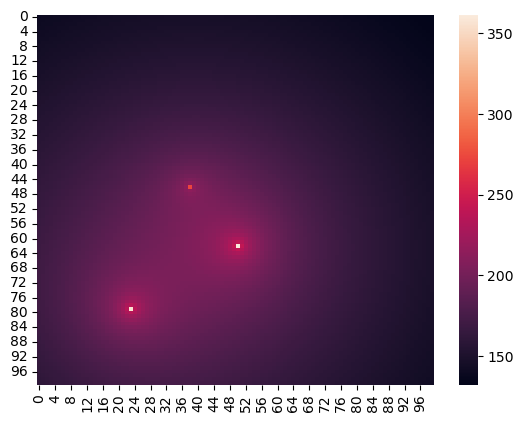

In [14]:
seaborn.heatmap(marine_map.matrix_decibel)

In [9]:
marine_map.matrix_decibel.max()

inf

In [15]:
simu.compute_marine_fauna_impact("fish")

In [ ]:
simu.update_matrix_decibels_impact_quantified("fish")

In [ ]:
seaborn.heatmap(simu.matrix_decibels)

In [ ]:
seaborn.heatmap(simu.matrix_decibels_impact_quantified)

In [ ]:
boat_speed = 10
length, width = 10, 3
flotation_surface = length * width

reference_sound_power = 10**-10 # Watts
reference_flotation_surface = 1 # square meter

boat_sound_power = 0.11 * boat_speed + 0.0053 * flotation_surface # Watts

sound_level = 10 * np.log10(boat_sound_power / reference_sound_power) + 2 * np.log10(flotation_surface / reference_flotation_surface)
sound_level

In [ ]:
distance = 100


In [ ]:
matrix = np.zeros((100, 100))
matrix

In [ ]:
(xmax-xmin)

In [ ]:
import numpy as np
xmin = 10; ymin = 40; xmax = 40; ymax = 100
step = 10
matrix = np.zeros(((xmax-xmin) // step, (ymax-ymin) // step))
matrix

In [ ]:
def distance(matrix, x0, y0, step=100):
    x, y = np.meshgrid(range(len(matrix)), range(len(matrix[0])))
    return np.sqrt((x - x0) ** 2 + (y - y0) ** 2) * step
    

In [ ]:
def sound_propagation(matrix, x0, y0, step=100, sound_level=100):
    matrix_distance = distance(matrix, x0, y0, step)
    matrix_sound = sound_level - 20 * np.log10(matrix_distance)
    matrix_sound[x0, y0] = sound_level
    return matrix_sound

In [ ]:
matrix_sound = sound_propagation(matrix, x0=50, y0=50, step=100, sound_level=100)
matrix_sound

In [ ]:
matrix_sound.max()

In [ ]:
seaborn.heatmap(matrix_sound)

In [ ]:
xo, yo = 1, 2

In [ ]:
xo - matrix[:, 1] ** 2

In [ ]:
Niveau de pression sonore (en décibels) = 10 * log10 (puissance sonore du bateau / puissance sonore de référence) + 2 * log10 (distance de mesure / distance de référence)

La puissance sonore du bateau est généralement estimée en utilisant la formule suivante :

Puissance sonore du bateau (en watts) = 0,11 * vitesse du bateau (en noeuds) + 0,0053 * surface de flottaison (en mètres carrés)

La puissance sonore de référence est généralement prise comme étant 1 picoWatt (1 * 10^-12 W) et la distance de référence est généralement prise comme étant 1 mètre.

In [ ]:
initial_sound_level
initial_sound_level * np.log10(self.speed / 12)

In [ ]:
fish.spot_gpd

In [ ]:
within_points = fish.spot_gpd.sjoin(simu.matrix_decibels_quantified_gpd, map, op = 'within')

In [ ]:
mask = simu.matrix_decibels_quantified_gpd.within(marine_fauna.spot_gpd.geometry[0])

In [ ]:
matrix_decibels_impact_gpd = self.matrix_decibels_quantified_gpd[mask]
dict_impact = matrix_decibels_impact_gpd["value"].value_counts().to_dict()
array_impact = np.zeros(marine_fauna.array_impact.shape[0])
for level in range(len(array_impact)):
    array_impact[level] = 0 if level not in dict_impact else dict_impact[level]
array_impact = array_impact / array_impact.sum()
marine_fauna.set_array_impact(array_impact)

In [ ]:
fish.array_impact

In [ ]:
boat1.speed = 20

In [ ]:
boat1.set_speed_and_sound_level(20)

In [ ]:
boat1.sound_level

In [ ]:
seaborn.heatmap(simu.matrix_decibels)

In [ ]:
"""
Source level: the amount of sound radiated by a sound source. 
It is defined as the intensity of the radiated sound at a distance
of 1 meter from the source, where intensity is the amount of sound
power transmitted through a unit area in a specified direction. 
Source level is given as a relative intensity in units named 
decibels (dB). In underwater sound, decibels are referenced to a 
pressure of 1 microPascal (µPa). Therefore, source level is reported
in units of dB re 1 µPa @ 1 m.

transmission loss: the decrease in acoustic intensity (due to 
spreading and/or attenuation) as an underwater sound wave propagates
outwards from a source.

sound spreading loss: the decrease in intensity that occurs when a
sound wave expands as it moves away from a source

attenuation: the decrease in the intensity of a wave due to the loss
of acoustic energy to heat energy

target strength: the amount of sound reflected back toward a sonar 
by a target.

bandwidth: the frequency span of a signal, calculated as the 
difference between the highest frequency of a signal and the lowest 
frequency of a signal.

"""

In [ ]:
# array_gain = 20 dB
AG = 20
# Typical operating parameters for such a sonar might be
# source level = 220 dB re 1 µPa at 1 m
SL = 220

In [ ]:
# Spreading loss (dB) = 20 log R = 20 log (10,000) = 80 dB
R = 10000
spreading_loss = 20 * np.log10(R)
# Attenuation (dB) = αR = (0.5 dB/km x 10 km) = 5 dB
# aplha = 0.5 dB/km at a frequency of 8,000 Hz
alpha = 0.5
attenuation = alpha * (R * 1e-3)

In [ ]:
# transmission loss = spreading_loss + attenuation = 80 + 5 = 85 dB
TL = spreading_loss + attenuation

In [ ]:
# target strength for a submarine, as measured broadside to the
# submarine, vary widely, but a typical number is 25 dB
TS = 25

In [ ]:
# For a destroyer traveling at 15 knots, a typical self-noise level
# in a 1 Hertz wide frequency band at 8,000 Hz might be :
# noise level = 63 dB re 1 μPa/√Hz
NL = 63

In [ ]:
# bandwidth (Hz) = 1 / T where T is the sonar pulse length in seconds.
# For this example we assume that the sonar transmits a 0.1 second long pulse.
T = 0.1
BW = 1 / T
# NLtotal (dB re 1 µPa) = noise_level + 10 log bandwidth
NL_total = NL + 10 * np.log10(BW)

In [ ]:
# signal_to_noise = source_level - 2 * transmission_loss + target_strength - (noise_level - array_gain)
SNR = SL - 2 * TL + TS - (NL - AG)

In [ ]:
SNR